
<h1><i> <font color="#000099"><font face="Tribuchet">Resultados</font></font></i></h1>

<p> Nesta secção vamos mostrar o resultados dos modelos em função de dos parâmetros escolhidos usando  <b>Linguagem Julia</b> .</p>

<h3><i> <font color="red">Pacotes: </font></i></h3>

<p>Para a realização dessa tarefefa vamos usar os seguintes pacotes: </p>

In [4]:
using Plots                   # pacote para graficos
using SymPy                   # Pacote para linguagem simbolica
using DifferentialEquations   # pacote para cálculo

<h3><i> <font color="red">*Modelo Malthus </font></i></h3>

In [25]:
#constante de crescimento K>0
k=Sym("k")
#população inicial p(0)
p_0=Sym("p_0")
#P(t)=
p=p_0*exp(k*t)


     k*t
p_0*e   

In [14]:
dt=diff(p,t)

       k*t
k*p_0*e   

<p>Simulação durante um tempo t </p>

In [2]:
#modelo de Malthus
# k deve ser pequene
# t deve ser colocado em forma de intervalo t=t_0:t_f

function M(t,k,p_0) 
  p_0*exp.(k*t)      #exp. faz a iteração
end

M (generic function with 1 method)

In [105]:
n=M(1,1,100)


271.8281828459045

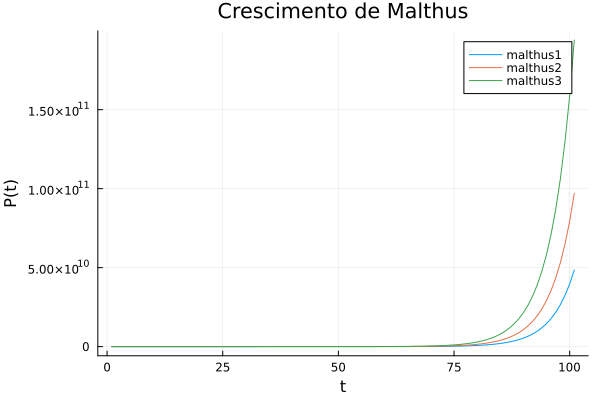

In [5]:
p=M(0:100,0.2,100)
plot(p)
q=M(0:100,0.2,200)
plot(q)
r=M(0:100,0.2,400)
plot(r)

plot(p,title="Crescimento de Malthus",xlabel="t", ylabel="P(t)", label="malthus1")

plot!(q,title="Crescimento de Malthus",xlabel="t", ylabel="P(t)", label="malthus2")

plot!(r,title="Crescimento de Malthus",xlabel="t", ylabel="P(t)", label="malthus3")

<h3><i> <font color="red">*Modelo Gompertz </font></i></h3>

In [6]:
# numero de euler
e=Sym("e")
#Tempo de observação
t=Sym("t")
#Tamanho maximo do tumor
k=Sym("k")
#constante de crescimento intrínseca das células
r=Sym("r")
#população inicial N(0)
n_0=Sym("n_0")
k*e^(-exp(r*t)*log(n_0/k))

   r*t    /n_0\  
 -e   *log|---|  
          \ k /  
e              *k

In [7]:
#criar um vetor de 1s
#modelo de Gompertz
function O(t,r,k,n_0) # t deve ser colocado em forma de intervalo t=t_0:t_f
  k*exp(-exp(-r*t)*log(k/n_0))
end

O (generic function with 1 method)

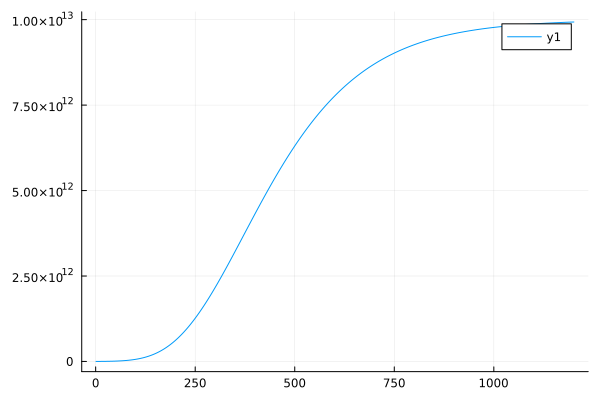

In [8]:
g1=O.(0:1200,0.006,10^13,10^9)
plot(g1)

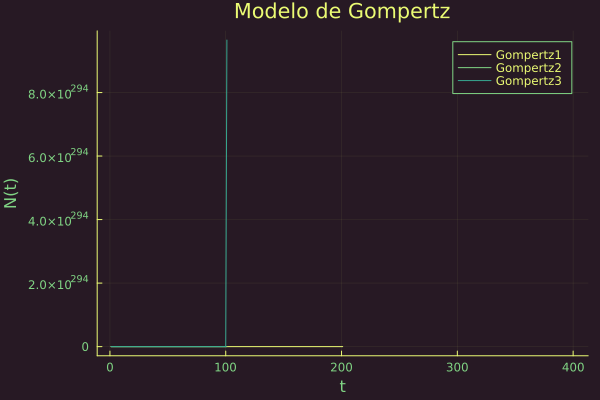

In [162]:
#g1=G.(0:200,0.006,10^13,10^9)
#plot(g1)
#g2=G.(0:100,0.006,10^13,10^12)
#plot(g2)
#g3=G.(0:400,0.06,10^13,2*10^12)
#plot(g3)


#plot(g1,title="Modelo de Gompertz",xlabel="t", ylabel="N(t)", label="Gompertz1")

#plot!(g2,title="Modelo de Gompertz",xlabel="t", ylabel="N(t)", label="Gompertz2")
#plot!(g3,title="Modelo de Gompertz",xlabel="t", ylabel="N(t)", label="Gompertz3")






In [115]:
G(0,4,2,100)

LoadError: MethodError: no method matching -(::Float64, ::StepRangeLen{Int64, Int64, Int64, Int64})
For element-wise subtraction, use broadcasting with dot syntax: scalar .- array
[0mClosest candidates are:
[0m  -(::Union{Float16, Float32, Float64}) at float.jl:381
[0m  -(::T, [91m::T[39m) where T<:Union{Float16, Float32, Float64} at float.jl:384
[0m  -(::Union{Float16, Float32, Float64}, [91m::BigFloat[39m) at mpfr.jl:465
[0m  ...

<h3><i> <font color="red">*Modelo Bertalanffy </font></i></h3>

In [88]:

# numero de euler
e=Sym("e")
#Tempo de observação
t=Sym("t")
#Tamanho maximo do tumor
k=Sym("k")
#constante de crescimento intrínseca das células
b=Sym("b")
#população inicial N(0)
p_0=Sym("p_0")
Pt=(1+(p_0/k-1)e^((b*t)/3))^3

                     3
/ b*t               \ 
| ---               | 
|  3  /     p_0\    | 
|e   *|-1 + ---| + 1| 
\     \      k /    / 

In [102]:
#modelo Bertalanffy
p_0=100
b=3
k=100
function B(t) # t deve ser colocado em forma de intervalo t=t_0:t_f
   Pt=(1+(p_0/k-1)*exp(1)^((b*t)/3))^3
end

B (generic function with 2 methods)

In [103]:
B(0)

1.0

In [104]:
B(1)

1.0

In [105]:
B(40)

1.0

In [106]:
B(0:.5:40)

LoadError: MethodError: no method matching ^(::Float64, ::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64})
[0mClosest candidates are:
[0m  ^(::T, [91m::VectorizationBase.AbstractSIMD{W, T}[39m) where {W, T<:Union{Float32, Float64}} at C:\Users\Carlos\.julia\packages\SLEEFPirates\lGkVv\src\SLEEFPirates.jl:216
[0m  ^(::T2, [91m::VectorizationBase.AbstractSIMD{W, T1}[39m) where {W, T1<:Union{Float32, Float64}, T2<:Union{Bool, Float16, Float32, Float64, Int16, Int32, Int64, Int8, UInt16, UInt32, UInt64, UInt8, SIMDTypes.Bit}} at C:\Users\Carlos\.julia\packages\SLEEFPirates\lGkVv\src\SLEEFPirates.jl:218
[0m  ^(::T, [91m::Rational[39m) where T<:AbstractFloat at rational.jl:482
[0m  ...

<h3><i> <font color="red">*Modelo de Tratamento </font></i></h3>

In [78]:

# numero de euler
e=Sym("e")
#Tempo de observação
t=Sym("t")
#Tamanho maximo do tumor
k=Sym("k")
#constante de crescimento intrínseca das células
b=Sym("b")
#população inicial N(0)
p_0=Sym("p_0")
Pt=(1+(p_0/k-1)e^((b*t)/3))^3


0.6666666666666666

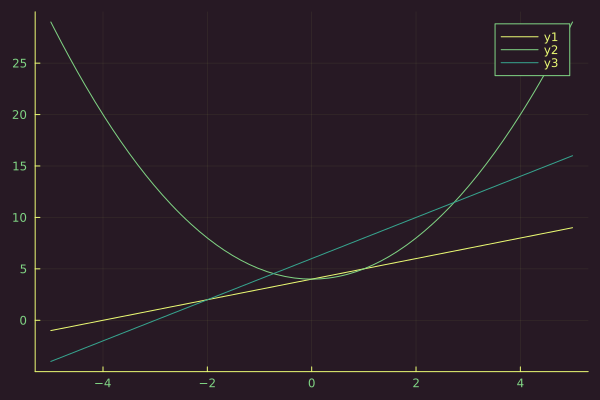

In [70]:
#varios graficos de uma vez:
x= 0:5
A(x)=x+4
B(x)=x^2+4
C(x)=2*x+6
plot(A)
plot!(B)
plot!(C)

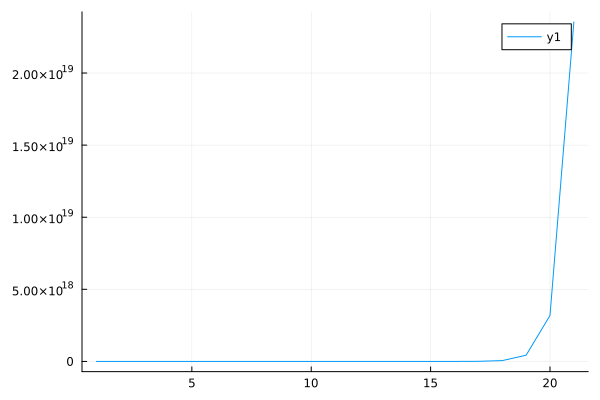

In [51]:
#usar analise de sensibilidade...
#p_0*exp.(k*t)

t= 0:5
A(x)=100*exp.(2*t)
B(x)=100*exp.(2*)
C(x)=100*exp(2*)
plot(A)
plot!(B)
plot!(C)

In [79]:
n_0=10^9
r=0.006
k=10^3
function G(t) # t deve ser colocado em forma de intervalo t=t_0:t_f
  k*exp(exp(r*t)*log*((n_0))/k)
    
end

G (generic function with 2 methods)

In [81]:
g=G.(0:1200)
plot(g)

LoadError: MethodError: no method matching *(::Float64, ::typeof(log))
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:591
[0m  *(::T, [91m::T[39m) where T<:Union{Float16, Float32, Float64} at float.jl:385
[0m  *(::Union{Float16, Float32, Float64}, [91m::BigFloat[39m) at mpfr.jl:414
[0m  ...

In [95]:
n_0=10^9
r=0.006
k=10^13
function H(t) # t deve ser colocado em forma de intervalo t=t_0:t_f
  k*(exp(1))^(-exp(1)^((r*t)*log((n_0)/k)))
end

H (generic function with 1 method)

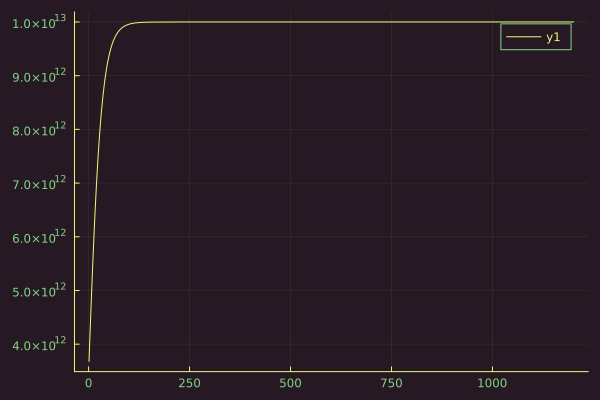

In [96]:
h=H.(0:1200)
plot(h)

In [102]:
using SymPy
k=Sym("k")
e=Sym("e")
n_0=Sym("n_0")
r=Sym("r")
t=Sym("t")

N=k*(e^(-e^((r*t)*log((n_0)/k))))

          /n_0\  
   r*t*log|---|  
          \ k /  
 -e              
e              *k

In [139]:
log(exp(1))


1.0